# 清理經理人更替

In [18]:
import os
import sys
import gc

import pandas as pd
import numpy as np

import re

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import scipy.stats as stats
from patsy import dmatrices
import statsmodels
from linearmodels.panel import FamaMacBeth
from linearmodels.panel import compare

import ast

In [19]:
# 設定 文字字型
plt.style.use('seaborn-v0_8-darkgrid')

if sys.platform == 'win32':
    print('Win')
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
elif sys.platform == 'darwin':
    print('Mac')
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

plt.rcParams['axes.unicode_minus']=False
# 設定 pandas 顯示 大小
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

# pd.set_option('display.max_columns', 20)  # or 1000
# pd.set_option('display.max_rows', 80)  # or 1000
# pd.set_option('display.max_colwidth', 20)  # or 199

Mac


## 讀取資料檔

In [20]:
display(os.listdir('./Data'))


['113_上櫃公司_總經理變動_change.csv',
 '113_上市公司_總經理變動_change.csv',
 '101_上市公司_總經理聘任_change.csv',
 '93_上市公司_總經理聘任_change.csv',
 '105_上市公司_總經理變動_change.csv',
 '97_上市公司_總經理變動_change.csv',
 '105_上櫃公司_總經理變動_change.csv',
 '103_上市公司_總經理人事_change.csv',
 '112_上市公司_任總經理_change.csv',
 '103_上櫃公司_總經理人事_change.csv',
 '110_上市公司_總經理異動_change.csv',
 '102_上櫃公司_任總經理_change.csv',
 '109_上櫃公司_總經理聘任_change.csv',
 '109_上市公司_總經理聘任_change.csv',
 '110_上櫃公司_總經理異動_change.csv',
 '106_上市公司_總經理異動_change.csv',
 '95_上市公司_任總經理_change.csv',
 '99_上市公司_總經理人事_change.csv',
 '93_上市公司_總經理人事_change.csv',
 '.DS_Store',
 '111_上櫃公司_總經理變動_change.csv',
 '111_上市公司_總經理變動_change.csv',
 '107_上市公司_總經理變動_change.csv',
 '95_上市公司_總經理變動_change.csv',
 '103_上櫃公司_總經理聘任_change.csv',
 '107_上櫃公司_總經理變動_change.csv',
 '109_上櫃公司_總經理人事_change.csv',
 '109_上市公司_總經理人事_change.csv',
 '100_上市公司_任總經理_change.csv',
 '93_上市公司_CEO_change.csv',
 '112_上市公司_總經理異動_change.csv',
 '112_上櫃公司_總經理異動_change.csv',
 '99_上市公司_總經理聘任_change.csv',
 '104_上櫃公司_總經理異動_change.csv',
 '104_上市公司

In [21]:
# df_expanded_list = []
# test_data = pd.read_csv('./經理人更替/113_上市公司_CEO_change.csv', encoding='utf-8')
# # display(test_data.head())
# import ast
# # 重新處理「網址」欄位，並避免欄位名稱衝突
# def parse_list_column_with_prefix(value):
#     try:
#         parsed_value = ast.literal_eval(value)  # 解析為Python物件
        
#         # 檢查是否為 list 且長度大於 0 且第一個元素為 list
#         if isinstance(parsed_value, list) and len(parsed_value) > 0 and isinstance(parsed_value[0], list):
#             result = {}
#             for sub_item in parsed_value:
#                 if not isinstance(sub_item, list):
#                     return {}
#                 else:
#                     parsed_dict = dict(zip(sub_item[::2], sub_item[1::2]))  # 轉換為字典        
#                     for k, v in parsed_dict.items():
#                         result[f"網址_{k}"] = v 
#             # 如果 網址_說明 存在，則將其拆分
#             if '網址_說明' in result.keys():
#                 result['網址_說明'] = result['網址_說明'].split('.')
#                 #將 , 轉為 _
#                 result['網址_說明'] = [x.replace(',', '_').replace('，','_').replace('。','') for x in result['網址_說明']]

#                 # 字串替換
#                 replace_item = ['、級職及簡歷']
#                 for i in range(0,len(result['網址_說明'])):
#                     for j in replace_item:
#                         if j in result['網址_說明'][i]:
#                             result['網址_說明'][i] = result['網址_說明'][i].replace(j,'')

#                 # 如果element中的最後一個字元是數字，將其移除
#                 result['網址_說明'] = [x[:-1] for x in result['網址_說明'] if x[-1].isdigit() ]
#                 # 把空字串移除
#                 result['網址_說明'] = [x for x in result['網址_說明'] if x != '']
#                 # 把空白移除
#                 result['網址_說明'] = [x.replace(' ','') for x in result['網址_說明']]

#                 # 如果字串中不含數字，則將/換為_
#                 for i in range(len(result['網址_說明'])):
#                     if not any(c.isdigit() for c in result['網址_說明'][i]):
#                         result['網址_說明'][i] = result['網址_說明'][i].replace('/','_')
#                 # 根據 : 拆分 
#                 result['網址_說明'] = [x.split(':') for x in result['網址_說明']]
                
#                 # 如果前四個字為異動情形，則該字串取代為異動情形
#                 for i in range(len(result['網址_說明'])):
#                     if '異動情形' in result['網址_說明'][i][0]:
#                         result['網址_說明'][i][0] = '異動情形'
#                 # if len(result['網址_說明']) > 6:
#                 #     display(result['網址_說明'])
                    
#                 regg_item = ['變動','舊任者','新任者','異動情形','異動原因','新任生效日期','其他應敘明事項']
#                 for i in range(0,len(result['網址_說明'])):
#                     for j in regg_item:
#                         if j in result['網址_說明'][i][0]:
#                             result[f"網址_說明_{result['網址_說明'][i][0]}"] = result['網址_說明'][i][1]

                
#                 # parsed_dict = dict(zip(sub_item[::2], sub_item[1::2])) 
#                 # parsed_link_explain_dict = dict(zip(result['網址_說明'][::2], result['網址_說明'][1::2]))  # 轉換為字典        
#                 # display(parsed_link_explain_dict)
#                 # for k, v in parsed_link_explain_dict.items():
#                 #         result[f"網址_說明_{k}"] = v 
#             return result
#             # result_df = pd.concat([pd.DataFrame.from_dict(r, orient='index').T for r in result],axis=1)
#             # 清理 網址_說明 欄位
            
#             # if '網址_說明' in result_df.columns:
#             #     # 根據 . 分割字串
#             #     # 如果element中的最後一個字元是數字，將其移除
#             #     result_df['網址_說明'] = result_df['網址_說明'].str.split('.')
                
#             # display(result_df)
#             # display(parsed_value[0])
#             # parsed_dict = dict(zip(parsed_value[0][::2], parsed_value[0][1::2]))  # 轉換為字典
#             # display({f"網址_{k}": v for k, v in parsed_dict.items()})
#             # return {f"網址_{k}": v for k, v in parsed_dict.items()}  # 加上前綴避免衝突
#         else:
#             return {}
#     except Exception:
#         return {}

# # 轉換「網址」欄位
# df_expanded = test_data.copy()
# df_expanded = df_expanded.join(df_expanded["網址"].apply(parse_list_column_with_prefix).apply(pd.Series))


# # 顯示處理後的資料
# display(df_expanded.head())

'113_上櫃公司_總經理變動_change.csv'

'113_上市公司_總經理變動_change.csv'

'101_上市公司_總經理聘任_change.csv'

'93_上市公司_總經理聘任_change.csv'

'105_上市公司_總經理變動_change.csv'

'97_上市公司_總經理變動_change.csv'

'105_上櫃公司_總經理變動_change.csv'

'103_上市公司_總經理人事_change.csv'

'112_上市公司_任總經理_change.csv'

'103_上櫃公司_總經理人事_change.csv'

'110_上市公司_總經理異動_change.csv'

'102_上櫃公司_任總經理_change.csv'

'109_上櫃公司_總經理聘任_change.csv'

'109_上市公司_總經理聘任_change.csv'

'110_上櫃公司_總經理異動_change.csv'

'106_上市公司_總經理異動_change.csv'

'95_上市公司_任總經理_change.csv'

'99_上市公司_總經理人事_change.csv'

'93_上市公司_總經理人事_change.csv'

'111_上櫃公司_總經理變動_change.csv'

'111_上市公司_總經理變動_change.csv'

'107_上市公司_總經理變動_change.csv'

'95_上市公司_總經理變動_change.csv'

'103_上櫃公司_總經理聘任_change.csv'

'107_上櫃公司_總經理變動_change.csv'

'109_上櫃公司_總經理人事_change.csv'

'109_上市公司_總經理人事_change.csv'

'100_上市公司_任總經理_change.csv'

'93_上市公司_CEO_change.csv'

'112_上市公司_總經理異動_change.csv'

'112_上櫃公司_總經理異動_change.csv'

'99_上市公司_總經理聘任_change.csv'

'104_上櫃公司_總經理異動_change.csv'

'104_上市公司_總經理異動_change.csv'

'105_上市公司_任總經理_change.csv'

'109_上市公司_總經理變動_change.csv'

'109_上櫃公司_總經理變動_change.csv'

'102_上市公司_總經理異動_change.csv'

'106_上櫃公司_任總經理_change.csv'

'94_上市公司_任總經理_change.csv'

'109_上櫃公司_任總經理_change.csv'

'98_上市公司_總經理異動_change.csv'

'105_上櫃公司_總經理聘任_change.csv'

'101_上市公司_總經理變動_change.csv'

'105_上市公司_總經理聘任_change.csv'

'97_上市公司_總經理聘任_change.csv'

'113_上市公司_任總經理_change.csv'

'111_上櫃公司_總經理人事_change.csv'

'107_上櫃公司_總經理人事_change.csv'

'95_上市公司_總經理人事_change.csv'

'107_上市公司_總經理人事_change.csv'

'101_上市公司_任總經理_change.csv'

'104_上市公司_任總經理_change.csv'

'99_上市公司_總經理變動_change.csv'

'113_上市公司_總經理人事_change.csv'

'113_上櫃公司_總經理人事_change.csv'

'105_上櫃公司_總經理人事_change.csv'

'97_上市公司_總經理人事_change.csv'

'111_上市公司_總經理聘任_change.csv'

'108_上櫃公司_總經理異動_change.csv'

'108_上市公司_總經理異動_change.csv'

'111_上櫃公司_總經理聘任_change.csv'

'111_上櫃公司_任總經理_change.csv'

'103_上櫃公司_總經理變動_change.csv'

'107_上櫃公司_總經理聘任_change.csv'

'103_上市公司_總經理變動_change.csv'

'107_上市公司_總經理聘任_change.csv'

'95_上市公司_總經理聘任_change.csv'

'107_上櫃公司_總經理異動_change.csv'

'107_上市公司_總經理異動_change.csv'

'95_上市公司_總經理異動_change.csv'

'108_上櫃公司_總經理聘任_change.csv'

'112_上櫃公司_任總經理_change.csv'

'111_上市公司_總經理異動_change.csv'

'111_上櫃公司_總經理異動_change.csv'

'108_上市公司_總經理聘任_change.csv'

'98_上市公司_總經理人事_change.csv'

'104_上市公司_總經理變動_change.csv'

'96_上市公司_總經理變動_change.csv'

'107_上市公司_任總經理_change.csv'

'104_上櫃公司_總經理變動_change.csv'

'112_上櫃公司_總經理變動_change.csv'

'112_上市公司_總經理變動_change.csv'

'102_上市公司_總經理人事_change.csv'

'102_上市公司_任總經理_change.csv'

'102_上櫃公司_總經理人事_change.csv'

'110_上市公司_任總經理_change.csv'

'108_上櫃公司_總經理人事_change.csv'

'108_上市公司_總經理人事_change.csv'

'105_上櫃公司_總經理異動_change.csv'

'105_上市公司_總經理異動_change.csv'

'97_上市公司_總經理異動_change.csv'

'98_上市公司_任總經理_change.csv'

'113_上市公司_總經理異動_change.csv'

'98_上市公司_總經理聘任_change.csv'

'113_上櫃公司_總經理異動_change.csv'

'100_上市公司_總經理人事_change.csv'

'105_上櫃公司_任總經理_change.csv'

'97_上市公司_任總經理_change.csv'

'106_上市公司_總經理變動_change.csv'

'94_上市公司_總經理變動_change.csv'

'102_上市公司_總經理聘任_change.csv'

'106_上櫃公司_總經理變動_change.csv'

'102_上櫃公司_總經理聘任_change.csv'

'110_上櫃公司_總經理變動_change.csv'

'110_上市公司_總經理變動_change.csv'

'104_上櫃公司_總經理聘任_change.csv'

'104_上市公司_總經理聘任_change.csv'

'100_上市公司_總經理變動_change.csv'

'112_上櫃公司_總經理聘任_change.csv'

'106_上櫃公司_總經理人事_change.csv'

'94_上市公司_總經理人事_change.csv'

'106_上市公司_總經理人事_change.csv'

'103_上市公司_任總經理_change.csv'

'110_上市公司_總經理人事_change.csv'

'103_上市公司_總經理異動_change.csv'

'103_上櫃公司_總經理異動_change.csv'

'113_上櫃公司_任總經理_change.csv'

'108_上市公司_總經理變動_change.csv'

'108_上櫃公司_總經理變動_change.csv'

'109_上市公司_任總經理_change.csv'

'96_上市公司_任總經理_change.csv'

'104_上櫃公司_總經理人事_change.csv'

'104_上櫃公司_任總經理_change.csv'

'96_上市公司_總經理人事_change.csv'

'104_上市公司_總經理人事_change.csv'

'112_上櫃公司_總經理人事_change.csv'

'106_上櫃公司_總經理聘任_change.csv'

'102_上櫃公司_總經理變動_change.csv'

'102_上市公司_總經理變動_change.csv'

'93_上市公司_任總經理_change.csv'

'109_上櫃公司_總經理異動_change.csv'

'110_上市公司_總經理聘任_change.csv'

'110_上櫃公司_總經理聘任_change.csv'

'109_上市公司_總經理異動_change.csv'

'111_上市公司_任總經理_change.csv'

'101_上市公司_總經理異動_change.csv'

'93_上市公司_總經理異動_change.csv'

'101_上櫃公司_總經理異動_change.csv'

'98_上市公司_總經理變動_change.csv'

'99_上市公司_任總經理_change.csv'

,公司代號,公司名稱,異動日期,序號,異動事項,網址,網址_序號,網址_發言日期,網址_發言時間,網址_發言人,網址_發言人職稱,網址_發言人電話,網址_主旨,網址_符合條款,網址_事實發生日,網址_說明,網址_說明_董事會決議日期或發生變動日期,網址_說明_舊任者職稱、姓名及簡歷,網址_說明_新任者職稱、姓名及簡歷,網址_說明_異動情形,網址_說明_異動原因,網址_說明_新任生效日期,網址_說明_變動人員職稱(請輸入〝董事長〞或〝總經理〞),網址_說明_發生變動日期,網址_說明_人員變動別（請輸入發言人、代理發言人、重要營運主管之名稱、財務主管、會計主管、公司治理主管、研發主管、內部稽核主管或訴訟及非訟代理人）,網址_說明_其他應敘明事項,網址_說明_選任或變動人員別（請輸入法人董事、法人監察人、獨立董事、自然人董事或自然人監察人）,網址_說明_新任者選任時持股數,網址_說明_同任期董事變動比率,網址_說明_同任期獨立董事變動比率,網址_說明_同任期監察人變動比率,網址_說明_屬三分之一以上董事發生變動（請輸入是或否）,網址_說明_新任者聯絡電話,網址_說明_其他應敘明事項(若事件發生或決議之主體係屬公開發行以上公司_本則重大訊息同時符合證券交易法施行細則第7條第6款所定對股東權益或證券價格有重大影響之事項),網址_說明_人員變動別（請輸入發言人、代理發言人、財務主管、研發主管或內部稽核主管）,網址_說明_董事會決議日或發生變動日期,網址_說明_人員變動別（請輸入發言人、代理發言人、財務主管、會計主管、研發主管、內部稽核主管或訴訟及非訟代理人）
0,4903,聯光通,113/08/02,1,公告本公司行政總經理變動,"[['序號', '1', '發言日期', '113/08/02', '發言時間', '14:32:24'], ['發言人', '林郁昌', '發言人職稱', '董事長', '發言人電話', '02-26570589'], ['主旨', '公告本公司行政總經理變動'], ['符合條款', '第6款', '事實發生日', '113/08/02'], ['說明', '1.董事會決議日期或發生變動日期:113/08/022.人員別（請輸入董事長或總經理）:行政總經理3.舊任者姓名:林郁昌4.舊任者簡歷:本公司董事長兼任行政總經理5.新任者姓名:無6.新任者簡歷:無7.異動情形（請輸入「辭職」、「解任」、「任期屆滿」、「職務調整」、「資遣」、「退休」、「逝世」或「新任」）:辭職8.異動原因:因公務繁忙，請辭行政總經理一職，專任董事長。9.新任生效日期:不適用10.其他應敘明事項(若事件發生或決議之主體係屬公開發行以上公司，本則重大訊息同時符合證券交易法施行細則第7條第6款所定對股東權益或證券價格有重大影響之事項):(1)本公司於113/08/02接獲辭任書，最後工作日為113/08/04。(2)新任者待董事會任命後另行公告。']]",1,113/08/02,14:32:24,林郁昌,董事長,02-26570589,公告本公司行政總經理變動,第6款,113/08/02,"[[董事會決議日期或發生變動日期, 113/08/02], [人員別（請輸入董事長或總經理）, 行政總經理], [舊任者姓名, 林郁昌], [舊任者簡歷, 本公司董事長兼任行政總經理], [新任者姓名, 無], [新任者簡歷, 無], [異動情形, 辭職], [異動原因, 因公務繁忙_請辭行政總經理一職_專任董事長], [新任生效日期, 不適用1]]",113/08/02,本公司董事長兼任行政總經理,無,辭職,因公務繁忙_請辭行政總經理一職_專任董事長,不適用1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3234,光環,113/05/31,2,代重要子公司珠海保稅區普瑞光電科技有限公司公告 董事長及總經理變動,"[['序號', '2', '發言日期', '113/05/31', '發言時間', '16:43:55'], ['發言人', '吳承儒', '發言人職稱', '執行副總經理', '發言人電話', '03-5780080'], ['主旨', '代重要子公司珠海保稅區普瑞光電科技有限公司公告董事長及總經理變動'], ['符合條款', '第6款', '事實發生日', '113/05/31'], ['說明', '1.董事會決議日期或發生變動日期:113/05/312.人員別（請輸入董事長或總經理）:董事長、總經理3.舊任者姓名:董事長 劉勝先總經理 劉勝先4.舊任者簡歷:珠海保稅區普瑞光電科技有限公司董事長暨總經理5.新任者姓名:董事長 無總經理 無執行董事 吳承儒6.新任者簡歷:吳承儒 珠海保稅區普瑞光電科技有限公司法人代表人及執行董事7.異動情形（請輸入「辭職」、「解任」、「任期屆滿」、「職務調整」、「資遣」、「退休」、「逝世」或「新任」）:解任及職務調整8.異動原因:解任及職務調整9.新任生效日期:113/05/3110.其他應敘明事項(若事件發生或決議之主體係屬公開發行以上公司，本則重大訊息同時符合證券交易法施行細則第7條第6款所定對股東權益或證券價格有重大影響之事項):無']]",2,113/05/31,16:43:55,吳承儒,執行副總經理,03-5780080,代重要子公司珠海保稅區普瑞光電科技有限公司公告董事長及總經理變動,第6款,113/05/31,"[[董事會決議日期或發生變動日期, 113/05/31], [人員別（請輸入董事長或總經理）, 董事長、總經理], [舊任者姓名, 董事長劉勝先總經理劉勝先], [舊任者簡歷, 珠海保稅區普瑞光電科技有限公司董事長暨總經理], [新任者姓名, 董事長無總經理無執行董事吳承儒], [新任者簡歷, 吳承儒珠海保稅區普瑞光電科技有限公司法人代表人及執行董事], [異動情形, 解任及職務調整], [異動原因, 解任及職務調整], [新任生效日期, 113/05/311]]",113/05/31,珠海保稅區普瑞光電科技有限公司董事長暨總經理,吳承儒珠海保稅區普瑞光電科技有限公司法人代表人及執行董事,解任及職務調整,解任及職務調整,113/05/311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4903,聯光通,113/04/18,1,公告本公司行政總經理兼營運總經理變動案,"[['序號', '1', '發言日期', '113/04/18', '發言時間', '17:01:10'], ['發言人', '林郁昌', '發言人職稱', '董事長', '發言人電話', '02-26570589'], ['主旨', '公告本公司行政總經理兼營運總經理變動案'], ['符合條款', '第6款', '事實發生日', '113/04/18'], ['說明', '1.董事會決議日期或發生變動日期:113/04/182.人員別（請輸入董事長或總經理）:行政總經理兼營運總經理3.舊任者姓名:蔡振財4.舊任者簡歷:本公司行政總經理兼營運總經理5.新任者姓名:不適用6.新任者簡歷:不適用7.異動情形（請輸入「辭職」、「解任」、「任期屆滿」、「職務調整」、「資遣」、「退休」、「逝世」或「新任」）:辭職8.異動原因:因家庭因素請辭9.新任生效日期:不適用10.其他應敘明事項(若事件發生或決議之主體係屬公開發行以上公司，本則重大訊息同時符合證券交易法施行細則第7條第6款所定對股東權益或證券價格有重大影響之事項):(1)本公司於113/04/18接獲辭任書，最後工作日為113/04/19。(2)新任者待董事會任命後另行公告。']]",1,113/04/18,17:01:10,林郁昌,董事長,02-26570589,公告本公司行政總經理兼營運總經理變動案,第6款,113/04/18,"[[董事會決議日期或發生變動日期, 113/04/18], [人員別（請輸入董事長或總經理）, 行政總經理兼營運總經理], [舊任者姓名, 蔡振財], [舊任者簡歷, 本公司行政總經理兼營運總經理], [新任者姓名, 不適用], [新任者簡歷, 不適用], [異動情形, 辭職], [異動原因, 因家庭因素請辭], [新任生效日期, 不適用1]]",113/04/18,本公司行政總經理兼營運總經理,不適用,辭職,因家庭因素請辭,不適用1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4903,聯光通,113/04/18,2,代重要子公司聯瑞科技股份有限公司公告 本公司行政總經理兼營運總經理變動案,"[['序號', '2', '發言日期', '113/04/18', '發言時間', '17:01:36'], ['發言人', '林郁昌', '發言人職稱', '董事長', '發言人電話', '02-26570589'], ['主旨', '代重要子公司聯瑞科技股份有限公司公告本公司行政總經理兼營運總經理變動案'], ['符合條款', '第6款', '事實發生日', '113/04/18'], ['說明', '1.董事會決議日期或發生變動日期:113/04/182.人員別（請輸入董事長或總經理）:行政總經理兼營運總經理3.舊任者姓名:蔡振財4.舊任者簡歷:本公司行政總經理兼營運總經理5.新任者姓名:不適用6.新任者簡歷:不適用7.異動情形（請輸入「辭職

<Axes: >

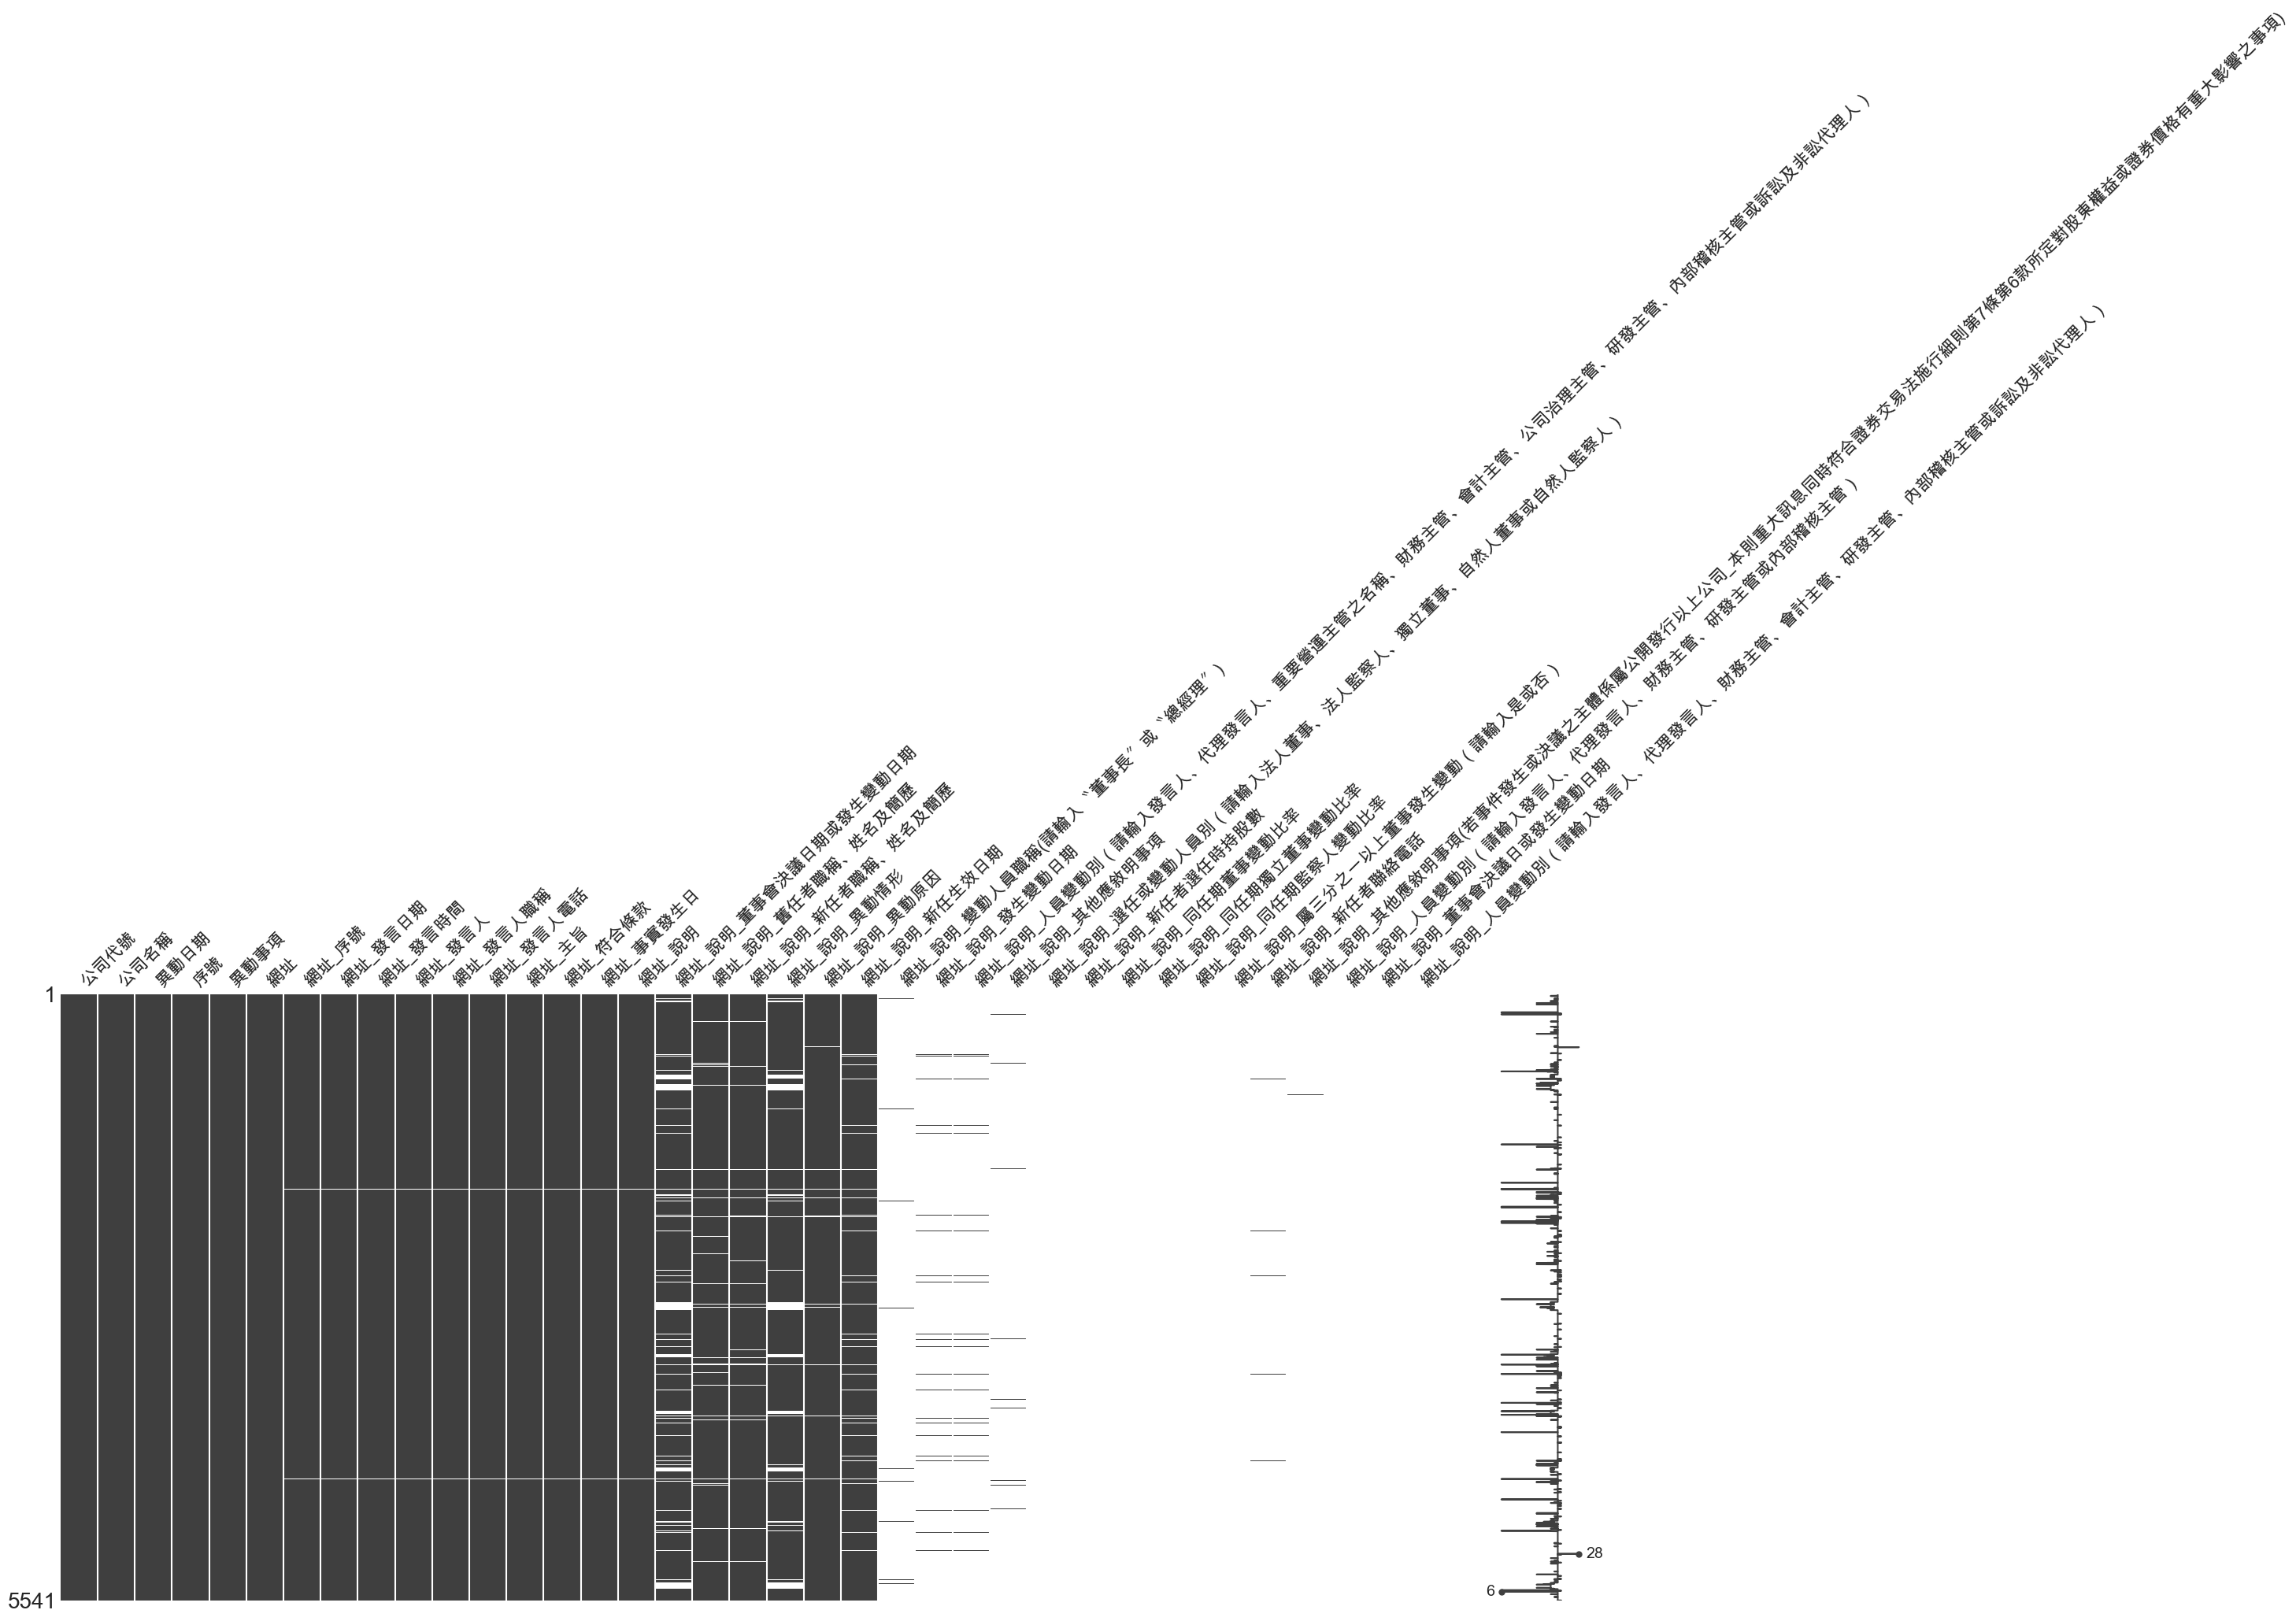

In [22]:
# 重新處理「網址」欄位，並避免欄位名稱衝突
def parse_list_column_with_prefix(value):
    try:
        parsed_value = ast.literal_eval(value)  # 解析為Python物件
        
        # 檢查是否為 list 且長度大於 0 且第一個元素為 list
        if isinstance(parsed_value, list) and len(parsed_value) > 0 and isinstance(parsed_value[0], list):
            result = {}
            for sub_item in parsed_value:
                if not isinstance(sub_item, list):
                    return {}
                else:
                    parsed_dict = dict(zip(sub_item[::2], sub_item[1::2]))  # 轉換為字典        
                    for k, v in parsed_dict.items():
                        result[f"網址_{k}"] = v 
            # 如果 網址_說明 存在，則將其拆分
            if '網址_說明' in result.keys():
                result['網址_說明'] = result['網址_說明'].split('.')
                #將 , 轉為 _
                result['網址_說明'] = [x.replace(',', '_').replace('，','_').replace('。','') for x in result['網址_說明']]

                # 字串替換
                replace_item = ['、級職及簡歷']
                for i in range(0,len(result['網址_說明'])):
                    for j in replace_item:
                        if j in result['網址_說明'][i]:
                            result['網址_說明'][i] = result['網址_說明'][i].replace(j,'')

                # 如果element中的最後一個字元是數字，將其移除
                result['網址_說明'] = [x[:-1] for x in result['網址_說明'] if x[-1].isdigit() ]
                # 把空字串移除
                result['網址_說明'] = [x for x in result['網址_說明'] if x != '']
                # 把空白移除
                result['網址_說明'] = [x.replace(' ','') for x in result['網址_說明']]

                # 如果字串中不含數字，則將/換為_
                for i in range(len(result['網址_說明'])):
                    if not any(c.isdigit() for c in result['網址_說明'][i]):
                        result['網址_說明'][i] = result['網址_說明'][i].replace('/','_')
                # 根據 : 拆分 
                result['網址_說明'] = [x.split(':') for x in result['網址_說明']]
                
                # 如果前四個字為異動情形，則該字串取代為異動情形
                for i in range(len(result['網址_說明'])):
                    if '異動情形' in result['網址_說明'][i][0]:
                        result['網址_說明'][i][0] = '異動情形'
                # if len(result['網址_說明']) > 6:
                #     display(result['網址_說明'])
                    
                regg_item = ['變動','舊任者','新任者','異動情形','異動原因','新任生效日期','其他應敘明事項']
                for i in range(0,len(result['網址_說明'])):
                    for j in regg_item:
                        if j in result['網址_說明'][i][0]:
                            # 替換名稱
                            replace_name = result['網址_說明'][i][0]
                            
                            # 舊任者
                            old_name = ['舊任者姓名','舊任者簡歷','舊任者姓名及簡歷']
                            if replace_name in old_name:
                                replace_name = '舊任者職稱、姓名及簡歷'
                            
                            # 新任者姓名
                            new_name = ['新任者姓名','新任者簡歷','新任者姓名及簡歷']
                            if replace_name in new_name:
                                replace_name = '新任者職稱、姓名及簡歷'

                            
                            # 人員變動別
                            change_name = ['人員變動別（請輸入發言人、代理發言人、重要營運主管之名稱、財務主管、會計主管、研發主管、內部稽核主管或訴訟及非訟代理人）',
                                        '人員變動別（請輸入發言人、代理發言人、重要營運主管、財務主管、會計主管、研發主管或內部稽核主管）',
                                        '人員變動別（請輸入發言人、代理發言人、重要營運主管(如'
                                        ]
                            if replace_name in change_name:
                                replace_name = '人員變動別（請輸入發言人、代理發言人、重要營運主管之名稱、財務主管、會計主管、公司治理主管、研發主管、內部稽核主管或訴訟及非訟代理人）'
                                
                            result[f"網址_說明_{replace_name}"] = result['網址_說明'][i][1]
                
                # replace_item = ['舊任者姓名',]
                # for i in range(0,len(result['網址_說明'])):
                #     for j in replace_item:



            return result
            # result_df = pd.concat([pd.DataFrame.from_dict(r, orient='index').T for r in result],axis=1)
            # 清理 網址_說明 欄位
            
            # if '網址_說明' in result_df.columns:
            #     # 根據 . 分割字串
            #     # 如果element中的最後一個字元是數字，將其移除
            #     result_df['網址_說明'] = result_df['網址_說明'].str.split('.')
                
            # display(result_df)
            # display(parsed_value[0])
            # parsed_dict = dict(zip(parsed_value[0][::2], parsed_value[0][1::2]))  # 轉換為字典
            # display({f"網址_{k}": v for k, v in parsed_dict.items()})
            # return {f"網址_{k}": v for k, v in parsed_dict.items()}  # 加上前綴避免衝突
        else:
            return {}
    except Exception:
        return {}

df_expanded_list = []
for file_name in os.listdir('./Data'):
    if file_name[0] =='.':
        continue
    display(file_name)
    test_data = pd.read_csv(f'./Data/{file_name}', encoding='utf-8')
    # 轉換「網址」欄位
    df_expanded = test_data.copy()
    df_expanded = df_expanded.join(df_expanded["網址"].apply(parse_list_column_with_prefix).apply(pd.Series))
    df_expanded_list.append(df_expanded)

df_expanded_df = pd.concat(df_expanded_list)

# 顯示處理後的資料
display(df_expanded_df.head())
display(msno.matrix(df_expanded_df))

In [23]:
list(df_expanded_df.columns)

['公司代號',
 '公司名稱',
 '異動日期',
 '序號',
 '異動事項',
 '網址',
 '網址_序號',
 '網址_發言日期',
 '網址_發言時間',
 '網址_發言人',
 '網址_發言人職稱',
 '網址_發言人電話',
 '網址_主旨',
 '網址_符合條款',
 '網址_事實發生日',
 '網址_說明',
 '網址_說明_董事會決議日期或發生變動日期',
 '網址_說明_舊任者職稱、姓名及簡歷',
 '網址_說明_新任者職稱、姓名及簡歷',
 '網址_說明_異動情形',
 '網址_說明_異動原因',
 '網址_說明_新任生效日期',
 '網址_說明_變動人員職稱(請輸入〝董事長〞或〝總經理〞)',
 '網址_說明_發生變動日期',
 '網址_說明_人員變動別（請輸入發言人、代理發言人、重要營運主管之名稱、財務主管、會計主管、公司治理主管、研發主管、內部稽核主管或訴訟及非訟代理人）',
 '網址_說明_其他應敘明事項',
 '網址_說明_選任或變動人員別（請輸入法人董事、法人監察人、獨立董事、自然人董事或自然人監察人）',
 '網址_說明_新任者選任時持股數',
 '網址_說明_同任期董事變動比率',
 '網址_說明_同任期獨立董事變動比率',
 '網址_說明_同任期監察人變動比率',
 '網址_說明_屬三分之一以上董事發生變動（請輸入是或否）',
 '網址_說明_新任者聯絡電話',
 '網址_說明_其他應敘明事項(若事件發生或決議之主體係屬公開發行以上公司_本則重大訊息同時符合證券交易法施行細則第7條第6款所定對股東權益或證券價格有重大影響之事項)',
 '網址_說明_人員變動別（請輸入發言人、代理發言人、財務主管、研發主管或內部稽核主管）',
 '網址_說明_董事會決議日或發生變動日期',
 '網址_說明_人員變動別（請輸入發言人、代理發言人、財務主管、會計主管、研發主管、內部稽核主管或訴訟及非訟代理人）']

In [24]:
display(df_expanded_df.isna().sum())
dorp_item = [ 
    '網址_說明_變動人員職稱(請輸入〝董事長〞或〝總經理〞)',
    '網址_說明_其他應敘明事項',
    '網址_說明_董事會決議日期或發生變動日期',
    '網址_說明_人員變動別（請輸入發言人、代理發言人、重要營運主管之名稱、財務主管、會計主管、公司治理主管、研發主管、內部稽核主管或訴訟及非訟代理人）',
    '網址_說明_發生變動日期',
    '網址_說明_其他應敘明事項(若事件發生或決議之主體係屬公開發行以上公司_本則重大訊息同時符合證券交易法施行細則第7條第6款所定對股東權益或證券價格有重大影響之事項)',
    '網址_說明_選任或變動人員別（請輸入法人董事、法人監察人、獨立董事、自然人董事或自然人監察人）',
    '網址_說明_新任者選任時持股數',
    '網址_說明_同任期董事變動比率',
    '網址_說明_同任期獨立董事變動比率',
    '網址_說明_同任期監察人變動比率',
    '網址_說明_屬三分之一以上董事發生變動（請輸入是或否）',
    '網址_說明_新任者聯絡電話',
    '網址_說明_董事會決議日或發生變動日期'
]
df_expanded_df.drop(columns=dorp_item,inplace=True)

公司代號                                                                                     0
公司名稱                                                                                     0
異動日期                                                                                     0
序號                                                                                       0
異動事項                                                                                     0
網址                                                                                       0
網址_序號                                                                                   25
網址_發言日期                                                                                 25
網址_發言時間                                                                                 25
網址_發言人                                                                                  25
網址_發言人職稱                                                                                25

In [25]:
display(df_expanded_df.head())

,公司代號,公司名稱,異動日期,序號,異動事項,網址,網址_序號,網址_發言日期,網址_發言時間,網址_發言人,網址_發言人職稱,網址_發言人電話,網址_主旨,網址_符合條款,網址_事實發生日,網址_說明,網址_說明_舊任者職稱、姓名及簡歷,網址_說明_新任者職稱、姓名及簡歷,網址_說明_異動情形,網址_說明_異動原因,網址_說明_新任生效日期,網址_說明_人員變動別（請輸入發言人、代理發言人、財務主管、研發主管或內部稽核主管）,網址_說明_人員變動別（請輸入發言人、代理發言人、財務主管、會計主管、研發主管、內部稽核主管或訴訟及非訟代理人）
0,4903,聯光通,113/08/02,1,公告本公司行政總經理變動,"[['序號', '1', '發言日期', '113/08/02', '發言時間', '14:32:24'], ['發言人', '林郁昌', '發言人職稱', '董事長', '發言人電話', '02-26570589'], ['主旨', '公告本公司行政總經理變動'], ['符合條款', '第6款', '事實發生日', '113/08/02'], ['說明', '1.董事會決議日期或發生變動日期:113/08/022.人員別（請輸入董事長或總經理）:行政總經理3.舊任者姓名:林郁昌4.舊任者簡歷:本公司董事長兼任行政總經理5.新任者姓名:無6.新任者簡歷:無7.異動情形（請輸入「辭職」、「解任」、「任期屆滿」、「職務調整」、「資遣」、「退休」、「逝世」或「新任」）:辭職8.異動原因:因公務繁忙，請辭行政總經理一職，專任董事長。9.新任生效日期:不適用10.其他應敘明事項(若事件發生或決議之主體係屬公開發行以上公司，本則重大訊息同時符合證券交易法施行細則第7條第6款所定對股東權益或證券價格有重大影響之事項):(1)本公司於113/08/02接獲辭任書，最後工作日為113/08/04。(2)新任者待董事會任命後另行公告。']]",1,113/08/02,14:32:24,林郁昌,董事長,02-26570589,公告本公司行政總經理變動,第6款,113/08/02,"[[董事會決議日期或發生變動日期, 113/08/02], [人員別（請輸入董事長或總經理）, 行政總經理], [舊任者姓名, 林郁昌], [舊任者簡歷, 本公司董事長兼任行政總經理], [新任者姓名, 無], [新任者簡歷, 無], [異動情形, 辭職], [異動原因, 因公務繁忙_請辭行政總經理一職_專任董事長], [新任生效日期, 不適用1]]",本公司董事長兼任行政總經理,無,辭職,因公務繁忙_請辭行政總經理一職_專任董事長,不適用1,NaN,NaN
1,3234,光環,113/05/31,2,代重要子公司珠海保稅區普瑞光電科技有限公司公告 董事長及總經理變動,"[['序號', '2', '發言日期', '113/05/31', '發言時間', '16:43:55'], ['發言人', '吳承儒', '發言人職稱', '執行副總經理', '發言人電話', '03-5780080'], ['主旨', '代重要子公司珠海保稅區普瑞光電科技有限公司公告董事長及總經理變動'], ['符合條款', '第6款', '事實發生日', '113/05/31'], ['說明', '1.董事會決議日期或發生變動日期:113/05/312.人員別（請輸入董事長或總經理）:董事長、總經理3.舊任者姓名:董事長 劉勝先總經理 劉勝先4.舊任者簡歷:珠海保稅區普瑞光電科技有限公司董事長暨總經理5.新任者姓名:董事長 無總經理 無執行董事 吳承儒6.新任者簡歷:吳承儒 珠海保稅區普瑞光電科技有限公司法人代表人及執行董事7.異動情形（請輸入「辭職」、「解任」、「任期屆滿」、「職務調整」、「資遣」、「退休」、「逝世」或「新任」）:解任及職務調整8.異動原因:解任及職務調整9.新任生效日期:113/05/3110.其他應敘明事項(若事件發生或決議之主體係屬公開發行以上公司，本則重大訊息同時符合證券交易法施行細則第7條第6款所定對股東權益或證券價格有重大影響之事項):無']]",2,113/05/31,16:43:55,吳承儒,執行副總經理,03-5780080,代重要子公司珠海保稅區普瑞光電科技有限公司公告董事長及總經理變動,第6款,113/05/31,"[[董事會決議日期或發生變動日期, 113/05/31], [人員別（請輸入董事長或總經理）, 董事長、總經理], [舊任者姓名, 董事長劉勝先總經理劉勝先], [舊任者簡歷, 珠海保稅區普瑞光電科技有限公司董事長暨總經理], [新任者姓名, 董事長無總經理無執行董事吳承儒], [新任者簡歷, 吳承儒珠海保稅區普瑞光電科技有限公司法人代表人及執行董事], [異動情形, 解任及職務調整], [異動原因, 解任及職務調整], [新任生效日期, 113/05/311]]",珠海保稅區普瑞光電科技有限公司董事長暨總經理,吳承儒珠海保稅區普瑞光電科技有限公司法人代表人及執行董事,解任及職務調整,解任及職務調整,113/05/311,NaN,NaN
2,4903,聯光通,113/04/18,1,公告本公司行政總經理兼營運總經理變動案,"[['序號', '1', '發言日期', '113/04/18', '發言時間', '17:01:10'], ['發言人', '林郁昌', '發言人職稱', '董事長', '發言人電話', '02-26570589'], ['主旨', '公告本公司行政總經理兼營運總經理變動案'], ['符合條款', '第6款', '事實發生日', '113/04/18'], ['說明', '1.董事會決議日期或發生變動日期:113/04/182.人員別（請輸入董事長或總經理）:行政總經理兼營運總經理3.舊任者姓名:蔡振財4.舊任者簡歷:本公司行政總經理兼營運總經理5.新任者姓名:不適用6.新任者簡歷:不適用7.異動情形（請輸入「辭職」、「解任」、「任期屆滿」、「職務調整」、「資遣」、「退休」、「逝世」或「新任」）:辭職8.異動原因:因家庭因素請辭9.新任生效日期:不適用10.其他應敘明事項(若事件發生或決議之主體係屬公開發行以上公司，本則重大訊息同時符合證券交易法施行細則第7條第6款所定對股東權益或證券價格有重大影響之事項):(1)本公司於113/04/18接獲辭任書，最後工作日為113/04/19。(2)新任者待董事會任命後另行公告。']]",1,113/04/18,17:01:10,林郁昌,董事長,02-26570589,公告本公司行政總經理兼營運總經理變動案,第6款,113/04/18,"[[董事會決議日期或發生變動日期, 113/04/18], [人員別（請輸入董事長或總經理）, 行政總經理兼營運總經理], [舊任者姓名, 蔡振財], [舊任者簡歷, 本公司行政總經理兼營運總經理], [新任者姓名, 不適用], [新任者簡歷, 不適用], [異動情形, 辭職], [異動原因, 因家庭因素請辭], [新任生效日期, 不適用1]]",本公司行政總經理兼營運總經理,不適用,辭職,因家庭因素請辭,不適用1,NaN,NaN
3,4903,聯光通,113/04/18,2,代重要子公司聯瑞科技股份有限公司公告 本公司行政總經理兼營運總經理變動案,"[['序號', '2', '發言日期', '113/04/18', '發言時間', '17:01:36'], ['發言人', '林郁昌', '發言人職稱', '董事長', '發言人電話', '02-26570589'], ['主旨', '代重要子公司聯瑞科技股份有限公司公告本公司行政總經理兼營運總經理變動案'], ['符合條款', '第6款', '事實發生日', '113/04/18'], ['說明', '1.董事會決議日期或發生變動日期:113/04/182.人員別（請輸入董事長或總經理）:行政總經理兼營運總經理3.舊任者姓名:蔡振財4.舊任者簡歷:本公司行政總經理兼營運總經理5.新任者姓名:不適用6.新任者簡歷:不適用7.異動情形（請輸入「辭職」、「解任」、「任期屆滿」、「職務調整」、「資遣」、「退休」、「逝世」或「新任」）:辭職8.異動原因:因家庭因素請辭9.新任生效日期:不適用10.其他應敘明事項(若事件發生或決議之主體係屬公開發行以上公司，本則重大訊息同時符合證券交易法施行細則第7條第6款所定對股東權益或證券價格有重大影響之事項):(1)本公司於113/04/18接獲辭任書，最後工作日為113/04/19。(2)新任者待董事會任命後另行公告。']]",2,113/04/18,17:01:36,林郁昌,董事長,02-26570589,代重要子公司聯瑞科技股份有限公司公告本公司行政總經理兼營運總經理變動案,第6款,113/04/18,"[[董事會決議日期或發生變動日期, 113/04/18], [人員別（請輸入董事長或總經理）, 行政總經理兼營運總經理], [舊任者姓名, 蔡振財], [舊任者簡歷, 本公司行政總經理兼營運總經理], [新任者姓名, 不適用], [新任者簡歷, 不適用], [異動情形, 辭職], [異動原因, 因家庭因素請辭], [新任生效日期, 不適用1]]",本公司行政總經理兼營運總經理,不適用,辭職,因家庭因素請辭,不適用1,NaN,NaN
0,5534,長虹,113/12/13,2,代子公司宏林營造廠公告該公司總經理變動。,"[['序號', '2', '發言日期', '113/12/13'

In [26]:
display(df_expanded_df.shape)

(5541, 23)

In [27]:
# 去掉 子公司
df_expanded_df = df_expanded_df[df_expanded_df['異動事項'].str.contains('子公司') == False]
display(df_expanded_df.shape)

(3514, 23)

In [28]:
display(df_expanded_df.groupby('網址_說明_異動原因').size().reset_index(name='counts').sort_values(by='counts', ascending=False))

,網址_說明_異動原因,counts
1136,職務調整,565
638,新任,260
1446,退休,186
1440,辭職,144
120,個人生涯規劃,76
1405,解任,25
68,任期屆滿,25
170,公司內部職務調整,20
663,晉升,19
111,個人因素,16


In [29]:
# for s_firm in df_expanded_df['公司代號'].unique():
#     # display(s_firm,df_expanded_df[df_expanded_df['公司代號'] == s_firm]['異動日期'].count())
#     # display(s_firm,df_expanded_df[df_expanded_df['公司代號'] == s_firm].sort_values(by=['異動日期'], ascending=True).head(5))
#     # 請幫我算出公司代號的異動日期的時間差
#     display(df_expanded_df[df_expanded_df['公司代號'] == s_firm]['異動日期'].diff().dt.days)
#     # df_expanded_df['在位時長'] = 
#     break
#     # display()

In [30]:
df_expanded_df.to_csv('./經理人更替_處理後.csv', index=False, encoding='utf-8-sig')

In [31]:
display(list(df_expanded_df['公司代號'].unique()))

[np.int64(4903),
 np.int64(1203),
 np.int64(2883),
 np.int64(2880),
 np.int64(2881),
 np.int64(2002),
 np.int64(2007),
 np.int64(2013),
 np.int64(2486),
 np.int64(2038),
 np.int64(5534),
 np.int64(3432),
 np.int64(3006),
 np.int64(3056),
 np.int64(1721),
 np.int64(2412),
 np.int64(2617),
 np.int64(2331),
 np.int64(4414),
 np.int64(2029),
 np.int64(2356),
 np.int64(2884),
 np.int64(2608),
 np.int64(9946),
 np.int64(6133),
 np.int64(3018),
 np.int64(2433),
 np.int64(8249),
 np.int64(2904),
 np.int64(3577),
 np.int64(5703),
 np.int64(6139),
 np.int64(2466),
 np.int64(2457),
 np.int64(2233),
 np.int64(1723),
 np.int64(1337),
 np.int64(6671),
 np.int64(6243),
 np.int64(4164),
 np.int64(1540),
 np.int64(2102),
 np.int64(5203),
 np.int64(2888),
 np.int64(4764),
 np.int64(6504),
 np.int64(4551),
 np.int64(1531),
 np.int64(8429),
 np.int64(9927),
 np.int64(2371),
 np.int64(1604),
 np.int64(1449),
 np.int64(1315),
 np.int64(2539),
 np.int64(3040),
 np.int64(9902),
 np.int64(3029),
 np.int64(4532

In [32]:
display(df_expanded_df[df_expanded_df['網址_主旨'].str.contains("子公司")==True].shape)
display()

(0, 23)

In [33]:
for s_form in df_expanded_df['公司代號'].unique():
    display(df_expanded_df[df_expanded_df['公司代號'] == 2330].head())
    break

,公司代號,公司名稱,異動日期,序號,異動事項,網址,網址_序號,網址_發言日期,網址_發言時間,網址_發言人,網址_發言人職稱,網址_發言人電話,網址_主旨,網址_符合條款,網址_事實發生日,網址_說明,網址_說明_舊任者職稱、姓名及簡歷,網址_說明_新任者職稱、姓名及簡歷,網址_說明_異動情形,網址_說明_異動原因,網址_說明_新任生效日期,網址_說明_人員變動別（請輸入發言人、代理發言人、財務主管、研發主管或內部稽核主管）,網址_說明_人員變動別（請輸入發言人、代理發言人、財務主管、會計主管、研發主管、內部稽核主管或訴訟及非訟代理人）
